In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sea
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from sklearn.metrics import r2_score

In [2]:
#reading training data
data = pd.read_csv('training_data/Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
#summary of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [4]:
#selecting close values and removing all nulls
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [5]:
#summary of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [6]:
#normalization
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [7]:
#creating to arrays with pur data for training

X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [9]:
#making a model using LSTM
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [10]:
#training the model
hist = model.fit(X_train, y_train, epochs = 15, batch_size = 64, verbose=2)

Epoch 1/15
18/18 - 4s - loss: 0.0760
Epoch 2/15
18/18 - 5s - loss: 0.0209
Epoch 3/15
18/18 - 5s - loss: 0.0134
Epoch 4/15
18/18 - 5s - loss: 0.0102
Epoch 5/15
18/18 - 6s - loss: 0.0095
Epoch 6/15
18/18 - 5s - loss: 0.0103
Epoch 7/15
18/18 - 5s - loss: 0.0151
Epoch 8/15
18/18 - 5s - loss: 0.0113
Epoch 9/15
18/18 - 5s - loss: 0.0083
Epoch 10/15
18/18 - 5s - loss: 0.0078
Epoch 11/15
18/18 - 5s - loss: 0.0068
Epoch 12/15
18/18 - 5s - loss: 0.0068
Epoch 13/15
18/18 - 5s - loss: 0.0067
Epoch 14/15
18/18 - 5s - loss: 0.0064
Epoch 15/15
18/18 - 5s - loss: 0.0064


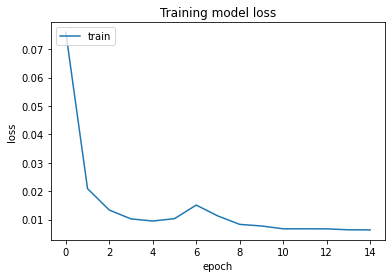

In [11]:
#plotting loss values with each epoch(iteration)
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [12]:
#reading test data
testData = pd.read_csv('training_data/Google_test_data.csv')

#selecting close values and removing all nulls
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 

#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [13]:
#array of predicted data
y_pred = model.predict(X_test)
y_pred

array([[1.2026774],
       [1.1991377],
       [1.1980845],
       [1.200323 ],
       [1.2054187],
       [1.2114962],
       [1.2166668],
       [1.2198749],
       [1.2214645],
       [1.222021 ],
       [1.2206753],
       [1.2169331],
       [1.21117  ],
       [1.2036222],
       [1.1955942],
       [1.188223 ],
       [1.1838098],
       [1.1840643],
       [1.1898717],
       [1.2014805],
       [1.2162112],
       [1.2317001],
       [1.244844 ],
       [1.2535018],
       [1.257106 ],
       [1.2564536],
       [1.2527505],
       [1.2465643],
       [1.2375536],
       [1.226071 ],
       [1.2126449],
       [1.197586 ],
       [1.1803972],
       [1.1609018],
       [1.1417185],
       [1.1256958],
       [1.1147066],
       [1.1095461],
       [1.1104418],
       [1.1158388],
       [1.1257087],
       [1.1397315],
       [1.1574057],
       [1.1777169],
       [1.1991602],
       [1.2196816],
       [1.2370607],
       [1.2508823],
       [1.261465 ],
       [1.2696608],


In [14]:
#removing normalization
predicted_price = sc.inverse_transform(y_pred)

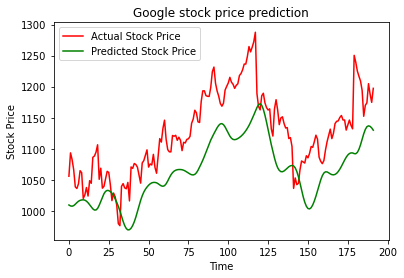

In [15]:
#plotting the predicted data against test data
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [16]:
#checking the fit using r2 method
reg1 = LinearRegression()
reg1 = reg1.fit(y_test,predicted_price)
r3 = reg1.score(y_test,predicted_price)
print(r3)

0.7066170286729163


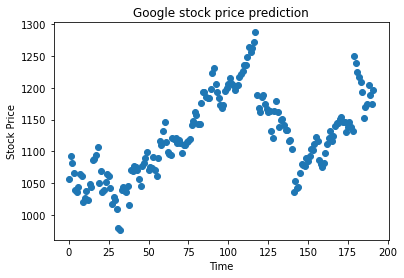

In [17]:
# A1 - There is a Linear Relationship between the Independent and Dependent Variables. 
# Not applicable by checking scatter plot
x_sct = np.arange(0,192)
plt.scatter(x_sct,y_test)
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

<AxesSubplot:>

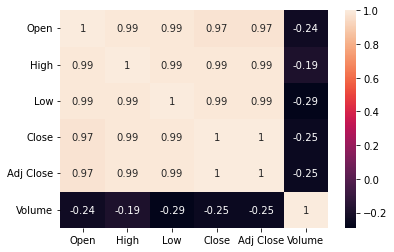

In [18]:
# correlation plot heatmap
# A2 - No multicollinearity 
# Not applicable as values > 0.4
hData = pd.read_csv('training_data/Google_test_data.csv')
hData = hData.dropna()
sea.heatmap(hData.corr(),annot=True)

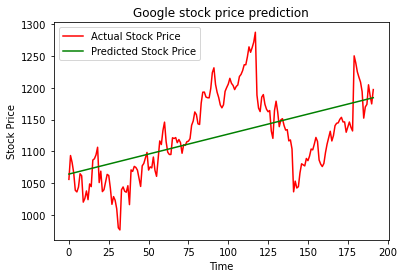

In [19]:
#linear regression
n = len(x_sct)

# cant use rank 1 matrix in scikit learn
x2 = x_sct.reshape((n,1))

#creating model
reg = LinearRegression()

# fitting data
reg = reg.fit(x2,y_test)

# y prediction
y_pred = reg.predict(x2)

#plotting regression line(predicted data against test data)
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(y_pred, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [20]:
# calc r squared score

r2 = reg.score(x2,y_test)

print(r2) # one x one y usually simple linear

0.29268452862035343


0.7391344760095685


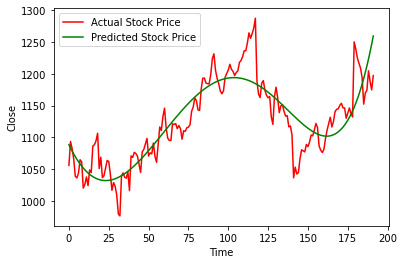

In [21]:
#polynomial reg

#making regression line
y2 = y_test.flatten() #converting to 1d array
maxx = np.max(x_sct)
minx = np.min(x_sct)
model = np.poly1d(np.polyfit(x_sct,y2,5))
line = np.linspace(minx,maxx, 1000)

#r2 score
print(r2_score(y_test, model(x_sct)))

#plotting

plt.plot(y_test, c = 'red', label = 'Actual Stock Price')
plt.plot(line,model(line),color = 'green', label = 'Predicted Stock Price')

plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()
plt.show()